In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../data/model_ready.csv')

1    112056
0     77106
Name: success, dtype: int64


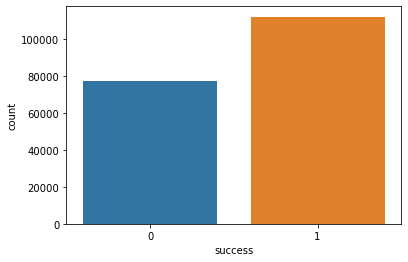

In [5]:
# check for class imbalance
print(df.success.value_counts())
sns.countplot(df.success);

1    0.592381
0    0.407619
Name: success, dtype: float64


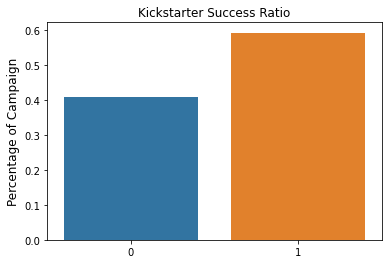

In [6]:
target = df.success.value_counts(normalize=True) 
print(target)
sns.barplot(target.index, target.values)
plt.title('Kickstarter Success Ratio')
plt.ylabel('Percentage of Campaign', fontsize=12);

In [7]:
# it's mildly imbalanced but not too bad

In [8]:
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'desc_length', 'staff_pick_True', 'main_category_Comics',
       'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
       'main_category_Fashion', 'main_category_Film & Video',
       'main_category_Food', 'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

In [9]:
df.rename(columns={'main_category_Comics': 'Comics',
                   'main_category_Crafts': 'Crafts', 
                   'main_category_Dance': 'Dance', 
                   'main_category_Design': 'Design',
                   'main_category_Fashion': 'Fashion', 
                   'main_category_Film & Video': 'Film_Video',
                   'main_category_Food': 'Food', 
                   'main_category_Games': 'Games', 
                   'main_category_Journalism': 'Journalism',
                   'main_category_Music': 'Music', 
                   'main_category_Photography': 'Photography',
                   'main_category_Publishing': 'Publishing', 
                   'main_category_Technology': 'Technology',
                   'main_category_Theater': 'Theater'}, inplace=True)
df.columns

Index(['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
       'desc_length', 'staff_pick_True', 'Comics', 'Crafts', 'Dance', 'Design',
       'Fashion', 'Film_Video', 'Food', 'Games', 'Journalism', 'Music',
       'Photography', 'Publishing', 'Technology', 'Theater'],
      dtype='object')

In [10]:
def make_confusion_matrix(model, threshold=0.6):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test_sc)[:,1] >=threshold)
    success_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(success_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['fail','success'],
           yticklabels=['fail','success']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

### Subset 1

In [11]:
# baselining with small subset of features
subset_1 = df.loc[:,['success', 'goal_usd', 'country_US', 'cam_duration']]
subset_1.head()

,success,goal_usd,country_US,cam_duration
0,1,5227.00000,1,29
1,0,47878.24160,0,30
2,1,1000.00000,1,30
3,1,1031.74888,0,30
4,1,550.00000,1,30


In [12]:
X, y = subset_1.drop(['success'], axis=1), subset_1.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [13]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)
lr_pred = lr.predict(X_test_sc)
lr_confusion = confusion_matrix(y_test, lr_pred)

lr_ac = lr.score(X_test_sc, y_test)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

lr_y_score = lr.predict_proba(X_test_sc)[:,1]
lr_fpr, lr_tpr, lr_auc_thresholds = roc_curve(y_test, lr_y_score)
roc_auc_lr = auc(lr_fpr, lr_tpr)

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.66      0.31      0.42     15415
           1       0.65      0.89      0.75     22418

    accuracy                           0.65     37833
   macro avg       0.66      0.60      0.59     37833
weighted avg       0.66      0.65      0.62     37833



In [14]:
print('Logistic Regression validation metrics with subset 1: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr_ac, 
         lr_precision, 
         lr_recall,
         lr_f1,
         roc_auc_lr)
     )

Logistic Regression validation metrics with subset 1: 
 Accuracy: 0.6536 
 Precision: 0.6515 
 Recall: 0.8930 
 F1: 0.7534 
 ROC: 0.6492


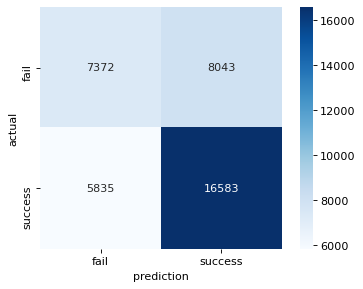

In [16]:
make_confusion_matrix(lr)

### Subset 2

In [17]:
subset_2 = df.loc[:,['success', 'goal_usd', 'country_US', 'cam_duration','prep_duration',
       'desc_length',]]
subset_2.head()

,success,goal_usd,country_US,cam_duration,prep_duration,desc_length
0,1,5227.00000,1,29,16,21
1,0,47878.24160,0,30,0,22
2,1,1000.00000,1,30,128,26
3,1,1031.74888,0,30,17,4
4,1,550.00000,1,30,4,25


In [18]:
X, y = subset_2.drop(['success'], axis=1), subset_2.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [19]:
lr2 = LogisticRegression(C=1000) #no regularization
lr2.fit(X_train_sc, y_train)
lr2_pred = lr2.predict(X_test_sc)
lr2_confusion = confusion_matrix(y_test, lr2_pred)

lr2_ac = lr2.score(X_test_sc, y_test)
lr2_precision = precision_score(y_test, lr2_pred)
lr2_recall = recall_score(y_test, lr2_pred)
lr2_f1 = f1_score(y_test, lr2_pred)

lr2_y_score = lr2.predict_proba(X_test_sc)[:,1]
lr2_fpr, lr2_tpr, lr2_auc_thresholds = roc_curve(y_test, lr2_y_score)
roc_auc_lr2 = auc(lr2_fpr, lr2_tpr)

print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.66      0.30      0.41     15415
           1       0.65      0.90      0.75     22418

    accuracy                           0.65     37833
   macro avg       0.66      0.60      0.58     37833
weighted avg       0.66      0.65      0.62     37833



In [20]:
print('Logistic Regression validation metrics with subset 2: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr2_ac, 
         lr2_precision, 
         lr2_recall,
         lr2_f1,
         roc_auc_lr2)
     )

Logistic Regression validation metrics with subset 2: 
 Accuracy: 0.6533 
 Precision: 0.6508 
 Recall: 0.8954 
 F1: 0.7537 
 ROC: 0.6604


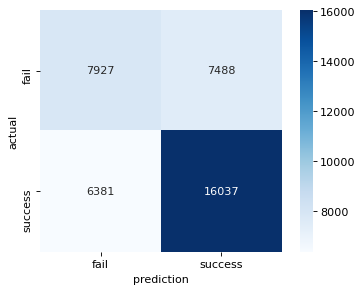

In [21]:
make_confusion_matrix(lr2)

### All features

In [22]:
X, y = df.drop(['success'], axis=1), df.success

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [23]:
lr3 = LogisticRegression(C=1000) #no regularization
lr3.fit(X_train_sc, y_train)
lr3_pred = lr3.predict(X_test_sc)
lr3_confusion = confusion_matrix(y_test, lr3_pred)

lr3_ac = lr3.score(X_test_sc, y_test)
lr3_precision = precision_score(y_test, lr3_pred)
lr3_recall = recall_score(y_test, lr3_pred)
lr3_f1 = f1_score(y_test, lr3_pred)

lr3_y_score = lr3.predict_proba(X_test_sc)[:,1]
lr3_fpr, lr3_tpr, lr3_auc_thresholds = roc_curve(y_test, lr3_y_score)
roc_auc_lr3 = auc(lr3_fpr, lr3_tpr)

print(classification_report(y_test, lr3_pred))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59     15415
           1       0.72      0.84      0.78     22418

    accuracy                           0.71     37833
   macro avg       0.71      0.68      0.68     37833
weighted avg       0.71      0.71      0.70     37833



In [24]:
print('Logistic Regression validation metrics with full dataset: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f \n ROC: %.4f' %
        (lr3_ac, 
         lr3_precision, 
         lr3_recall,
         lr3_f1,
         roc_auc_lr3)
     )

Logistic Regression validation metrics with full dataset: 
 Accuracy: 0.7102 
 Precision: 0.7176 
 Recall: 0.8424 
 F1: 0.7750 
 ROC: 0.7680


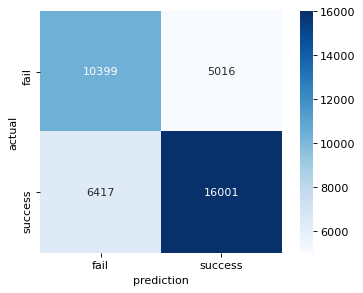

In [25]:
make_confusion_matrix(lr3)

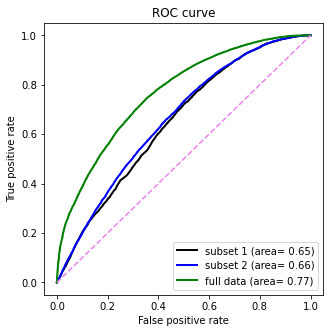

In [26]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='black', lw=lw, 
         label='subset 1 (area= %0.2f)' %roc_auc_lr)
plt.plot(lr2_fpr, lr2_tpr, color='blue', lw=lw, 
         label='subset 2 (area= %0.2f)' %roc_auc_lr2)
plt.plot(lr3_fpr, lr3_tpr, color='green', lw=lw, 
         label='full data (area= %0.2f)' %roc_auc_lr3)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right');

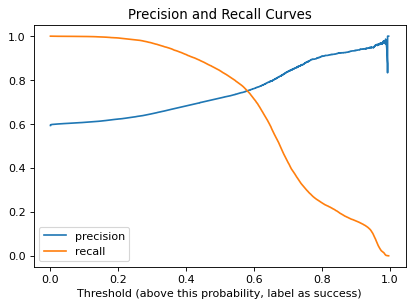

In [27]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr3.predict_proba(X_test_sc)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as success)');
plt.title('Precision and Recall Curves');

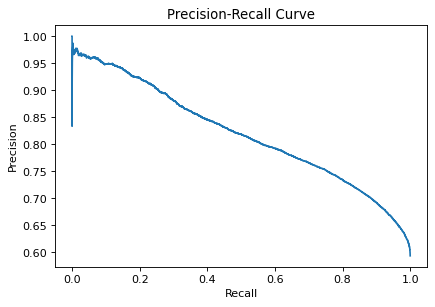

In [28]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [29]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, lr3.predict_proba(X_test_sc))))

from sklearn.dummy import DummyClassifier

dc = DummyClassifier()
dc.fit(X_train, y_train)
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, lr3.predict_proba(X_test_sc))))

print("Logistic accuracy: {:6.4f}".format(lr3.score(X_test_sc, y_test)))
print("Dummy accuracy: {:6.4f}".format(dc.score(X_test, y_test)))

Log-loss on logit: 0.5579
Log-loss on dummy classifier: 0.5579
Logistic accuracy: 0.7102
Dummy accuracy: 0.5926
